In [2]:
from pathlib import Path
import os

from numpy import pi as π

import example_speaker_arrays as esa
import optimize_dome as od
import program_channels as pc
import localization_models as lm

import write_faust_decoder as wfd

import numpy as np

# %% globals

try:
    _here = Path(__file__).parent
except NameError as ne:
    import os
    _here = Path(os.getcwd())
print(_here)

/Users/heller/Documents/adt_evaluation


In [3]:
# set elevation limits

# optimization 
el_lim = np.array((-30, 60)) * np.pi / 180

# evaluation
eval_el_lim = np.array((-45, 89)) * np.pi / 180

quiet = False

In [4]:
def make_decoder(C, S, el_lim, eval_el_lim):
    M_hf, result_dict_hf = od.optimize_dome(
            S,
            ambisonic_order=C,
            # eval_order=C,
            sparseness_penalty=0,
            el_lim=el_lim,
            do_report=True,
            random_start=False,
            eval_el_lim=eval_el_lim,
            quiet=quiet,
        )
    M_lf, result_dict_lf = od.optimize_dome_LF(
            M_hf,
            S.real_only(),
            ambisonic_order=C,
            el_lim=el_lim,
        )
    return M_hf, M_lf, result_dict_hf, result_dict_lf
    

ac: AER
ac: AER
SphericalData(Amb8) SphericalData(Amb8)
ac: AER
SphericalData(CMAP-8c8s4c) SphericalData(Amb4)
ac: XZY
SphericalData(CMAP-8c8s4c) SphericalData(imaginary speaker at nadir)
ac: XZY
SphericalData(CMAP-8c8s4c) SphericalData(imaginary speaker at zenith)


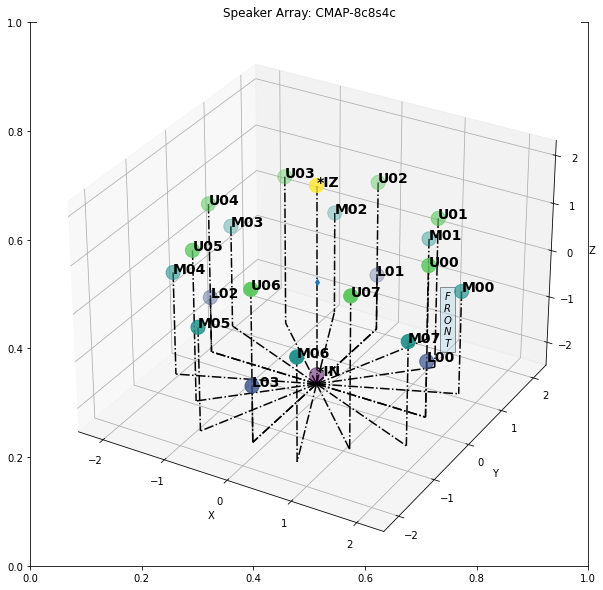

/Users/heller/Documents/adt_evaluation/plot_utils.py:146: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


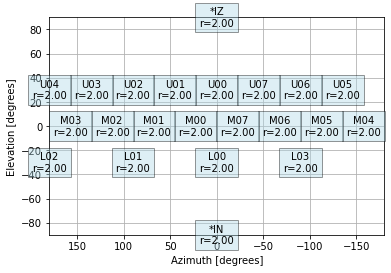

In [9]:
#%matplotlib tk
#%matplotlib ipympl

S = esa.emb_cmap884(bottom_ring=True)
S.plot3D(show=True)
S.plot_azel(show=True)
None

In [5]:
S.real_only().r

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

In [12]:
C = pc.ChannelsN3D(3, 3)
C = pc.ChannelsAmbiX(3, 3)
C = pc.ChannelsFuMa(3, 3)

print(C.sh_l)
print(C.sh_m)
print(C.channel_names)
print(C.normalization)

[0 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3]
[ 0  1 -1  0  0  1 -1  2 -2  0  1 -1  2 -2  3 -3]
['W', 'X', 'Y', 'Z', 'R', 'S', 'T', 'U', 'V', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
[0.70710678 0.57735027 0.57735027 0.57735027 0.4472136  0.51639778
 0.51639778 0.51639778 0.51639778 0.37796447 0.44821073 0.44821073
 0.50709255 0.50709255 0.47809144 0.47809144]


In [13]:
#do = enumerate((ho, vo) for ho in range(1,4) for vo in range(1, ho+1))

do = enumerate((o, o) for o in range(3, 4))
dsps = []

def run_it():
    try:
        i, (ho, vo) = next(do)
    except StopIteration:
        print("Done!")
    else:
        C = pc.ChannelsN3D(ho, vo)

        print(f"\n\n {i} ------ {S.description} : {C.id_string()}\n\n")

        M_hf, M_lf, result_dict_hf, result_dict_lf = make_decoder(C, S, el_lim, eval_el_lim)
        lm.plot_performance_LF(M_lf, M_hf, S.real_only().u.T, C.sh_l, C.sh_m)
        
        decoder_path = f"{S.name}-{C.id_string(slugify=True)}"
        dsps.append(
            wfd.write_faust_decoder_vienna(decoder_path+"-vienna.dsp", 
                                           decoder_path+"-vienna", 
                                           M_lf, M_hf, C.sh_l, 
                                           S.real_only().r, C.channel_mask)
        )
        if False:
            wfd.write_faust_decoder_dual_band(decoder_path+"-2band.dsp", 
                                              decoder_path+"-2band", 
                                              M_lf, M_hf, C.sh_l, 
                                              S.real_only().r, C.channel_mask)
        
        



 0 ------ EMB's home array, 8+8+4 : 3H3V ACN N3D


speaker array =  CMAP-8c8s4c


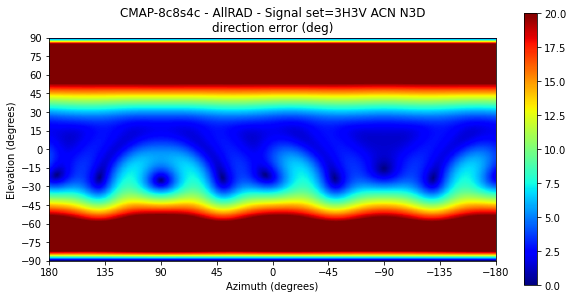

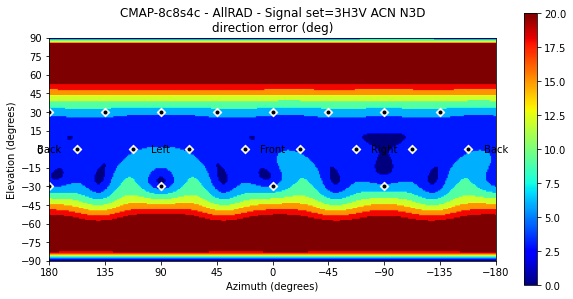

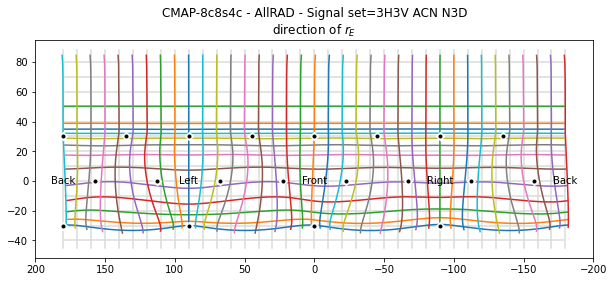

(361, 181) (361, 181) (361, 181)


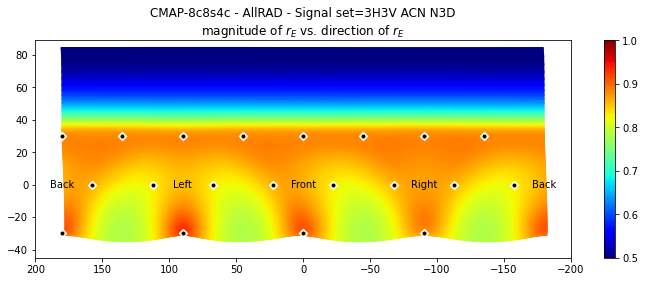

(361, 181) (361, 181) (361, 181)


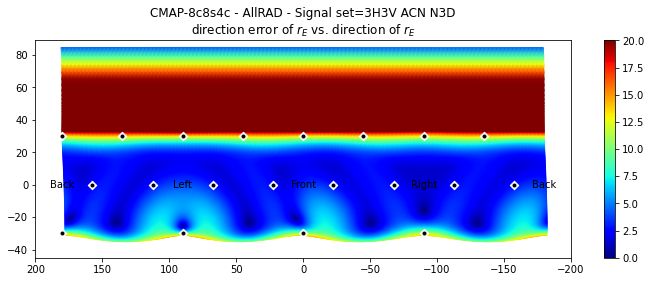

(361, 181) (361, 181) (361, 181)


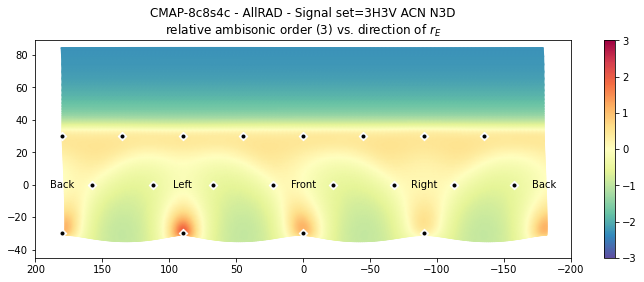

(361, 181) (361, 181) (361, 181)


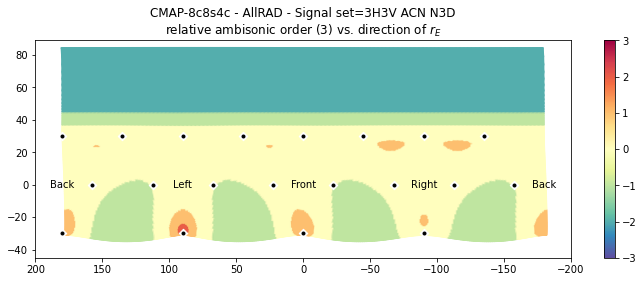

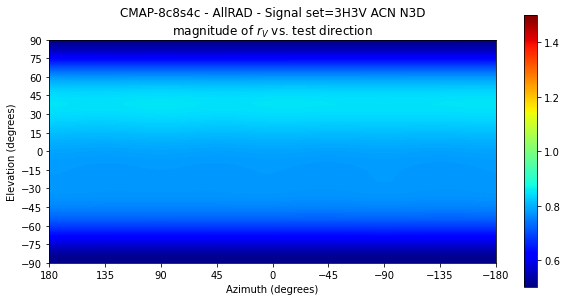

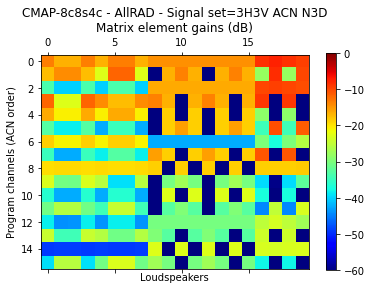



CMAP-8c8s4c - AllRAD - Signal set=3H3V ACN N3D
Diffuse field gain of each loudspeaker (dB)
M00:   -4.08 |=======================================================
M01:   -6.46 |=====================================================
M02:   -6.46 |=====================================================
M03:   -4.08 |=======================================================
M04:   -6.46 |=====================================================
M05:   -4.08 |=======================================================
M06:   -4.08 |=======================================================
M07:   -6.46 |=====================================================
U00:   -4.86 |=======================================================
U01:   -4.86 |=======================================================
U02:   -4.86 |=======================================================
U03:   -4.86 |=======================================================
U04:   -4.86 |=======================================================
U05: 

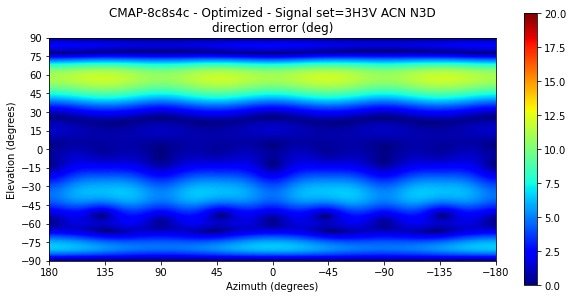

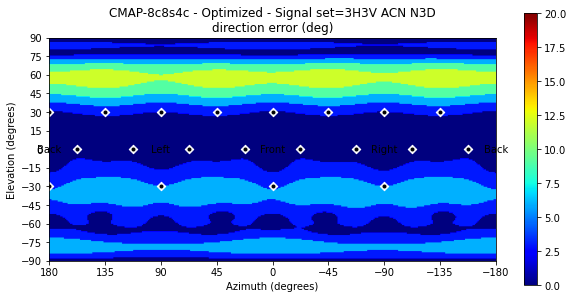

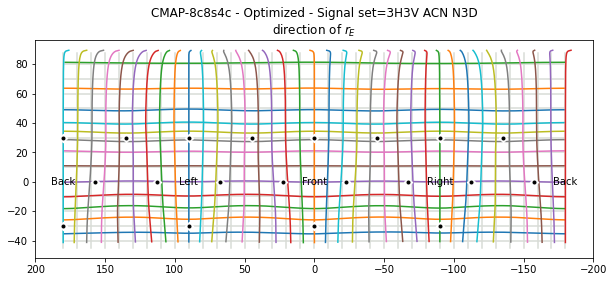

(361, 181) (361, 181) (361, 181)


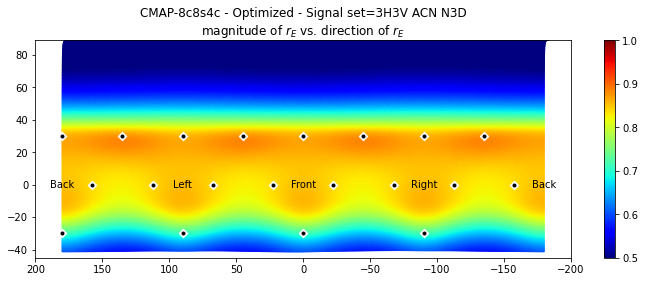

(361, 181) (361, 181) (361, 181)


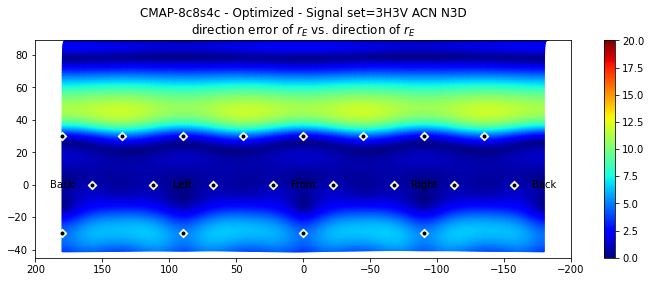

(361, 181) (361, 181) (361, 181)


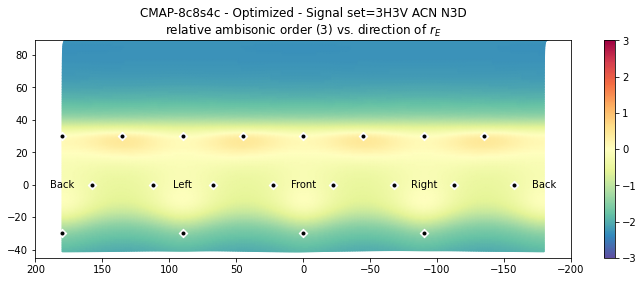

(361, 181) (361, 181) (361, 181)


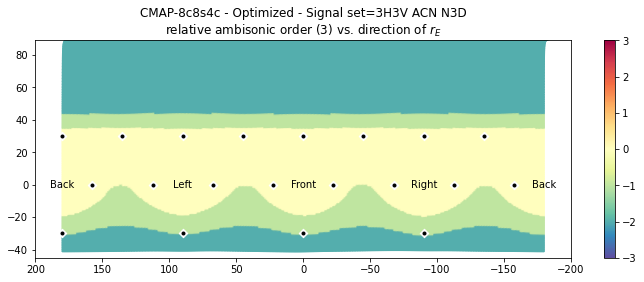

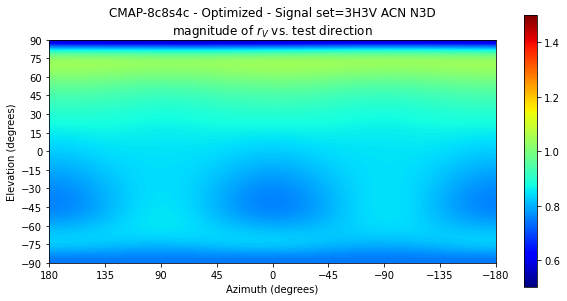

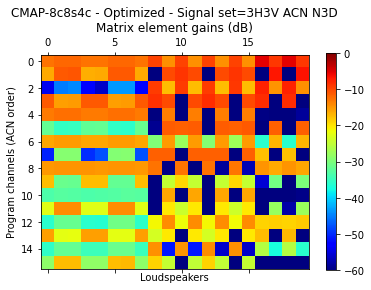

/Users/heller/Documents/adt_evaluation/optimize_dome.py:234: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print("Using:\n", Sr.ids[~off.copy()], file=f)


2023-02-27 14:36:32

 ambisonic_order = 3
el_lim = -30.0000 .. 60.0000
tikhonov_lambda = 0.001
sparseness_penalty = 0

Using:
 [['M00' 'M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'U00' 'U01' 'U02' 'U03'
  'U04' 'U05' 'U06' 'U07' 'L00' 'L01' 'L02' 'L03']]
Turned off:
 []


Diffuse field gain of each loudspeaker (dB)
M00:   -5.05 |======================================================
M01:   -4.58 |=======================================================
M02:   -4.56 |=======================================================
M03:   -5.06 |======================================================
M04:   -5.04 |======================================================
M05:   -4.57 |=======================================================
M06:   -4.58 |=======================================================
M07:   -5.02 |======================================================
U00:   -2.58 |=========================================================
U01:   -2.58 |===========================================

 This problem is unconstrained.



At iterate  150    f=  7.32313D+00    |proj g|=  3.39598D-01

At iterate  200    f=  7.32241D+00    |proj g|=  8.15330D-02

At iterate  250    f=  7.32183D+00    |proj g|=  1.98920D-01
  ys=-3.333E-02  -gs= 2.787E-03 BFGS update SKIPPED

At iterate  300    f=  7.21568D+00    |proj g|=  4.37906D+00

At iterate  350    f=  7.21301D+00    |proj g|=  1.29715D+00

At iterate  400    f=  7.20977D+00    |proj g|=  2.86375D+00

At iterate  450    f=  7.20604D+00    |proj g|=  2.72598D+00

At iterate  500    f=  7.20496D+00    |proj g|=  7.04217D-01

At iterate  550    f=  7.20466D+00    |proj g|=  3.83585D-01

At iterate  600    f=  7.20419D+00    |proj g|=  1.10422D+00

At iterate  650    f=  7.20260D+00    |proj g|=  3.03121D+00

At iterate  700    f=  7.20128D+00    |proj g|=  2.50104D+00

At iterate  750    f=  7.20053D+00    |proj g|=  2.23561D+00

At iterate  800    f=  7.19874D+00    |proj g|=  2.54663D+00

At iterate  850    f=  7.19631D+00    |proj g|=  1.11697D+00

At iterate  900  

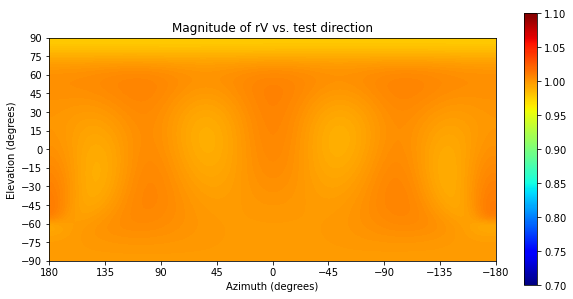

mean rV/rE direction error 2.159896701262432


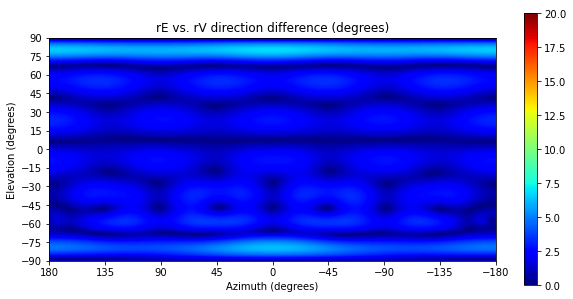

In [14]:
run_it()

In [ ]:
run_it()

In [ ]:
run_it()

In [ ]:
run_it()

In [ ]:
run_it()

In [ ]:
run_it()

In [ ]:
run_it()

In [ ]:
run_it()

In [29]:
!mkdir -p win32
!mkdir -p win64
!mkdir -p macos64

for dsp in dsps:
    d = Path(dsp)
    print(dsp, d.stem)
    #os.system(f"~/bin/faust2vst-ajh {dsp}; mv {d.stem}.vst macos64")
    #os.system(f"/usr/local/bin/faust2faustvst {dsp}; mv {d.stem}.vst macos64")
    #os.system(f"faust2w32vst {dsp}")
    #os.system(f"faust2w64vst {dsp}; mv {d.stem}.dll win64")
    os.system(f"~/src/audio/faust-2022/faust/tools/faust2appls/faust2w64vst-dbg {d}")
    


CMAP-8c8s4c-3h3v-acn-n3d-vienna.dsp CMAP-8c8s4c-3h3v-acn-n3d-vienna


x86_64-w64-mingw32-ld: unrecognized option '--target=x86_64-w64-mingw32'
x86_64-w64-mingw32-ld: use the --help option for usage information
x86_64-w64-mingw32-strip: 'faust.Wnn/CMAP-8c8s4c-3h3v-acn-n3d-vienna/CMAP-8c8s4c-3h3v-acn-n3d-vienna.dll': No such file


In [9]:
dsps

['CMAP-8c8s4c-3h3v-acn-n3d-vienna.dsp']